# Observations and Insights

In [26]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import sys as st
import scipy.stats as st
import numpy as np
import csv
 
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
testmouse_metadata = pd.read_csv(mouse_metadata_path)
teststudy_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_results = pd.merge(testmouse_metadata, teststudy_results, on = "Mouse ID")
combined_results

#Display the data table for preview
drugs_grouped = combined_results.groupby(["Drug Regimen"])
drugs_group_mean = round(drugs_grouped["Tumor Volume (mm3)"].mean(),2)
drugs_group_median = round(drugs_grouped["Tumor Volume (mm3)"].median(),2)
drugs_group_var = round(drugs_grouped["Tumor Volume (mm3)"].var(),2)
drugs_group_std = round(drugs_grouped["Tumor Volume (mm3)"].std(),2)
drugs_group_sem = round(drugs_grouped["Tumor Volume (mm3)"].sem(),2)
drug_groupsummary_stats_df = pd.DataFrame({"Mean Volume":drugs_group_mean,
                                 "Median Volume":drugs_group_median,
                                 "Variance":drugs_group_var,
                                 "Standard Deviation":drugs_group_std,
                                 "Standard Error of Measurment":drugs_group_sem})
drug_groupsummary_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error of Measurment
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [27]:
#Checking the number of mice.
testmouse_metadata["Mouse ID"].count()

249

In [28]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
teststudy_results['Mouse ID'].value_counts().head(25)

g989    13
q511    10
g296    10
d251    10
l897    10
i177    10
q633    10
l471    10
j984    10
a685    10
n364    10
p438    10
r701    10
c758    10
w151    10
k403    10
o926    10
s710    10
e227    10
w575    10
l700    10
c757    10
o331    10
g316    10
x773    10
Name: Mouse ID, dtype: int64

In [29]:
#Optional: Get all the data for the duplicate mouse ID. 
teststudy_results = teststudy_results.set_index("Mouse ID")

In [30]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
teststudy_results_droppedIndexData = teststudy_results.loc['g989', :]
teststudy_results_droppedIndexData.head(25)

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,0,45.000000,0
g989,0,45.000000,0
g989,5,48.786801,0
g989,5,47.570392,0
g989,10,51.745156,0
g989,10,49.880528,0
g989,15,51.325852,1
g989,15,53.442020,0
g989,20,55.326122,1


In [31]:
#Checking the number of mice in the clean DataFrame.
teststudy_results = teststudy_results.reset_index()
teststudy_results['Mouse ID'].value_counts().head(25)

g989    13
q511    10
g296    10
d251    10
l897    10
i177    10
q633    10
l471    10
j984    10
a685    10
n364    10
p438    10
r701    10
c758    10
w151    10
k403    10
o926    10
s710    10
e227    10
w575    10
l700    10
c757    10
o331    10
g316    10
x773    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [32]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#This method is the most straighforward, creating multiple series and putting them all together at the end.
combined_micestudy_results = pd.merge(testmouse_metadata, teststudy_results, on="Mouse ID")
combined_micestudy_results.head(10)


testmice_grouped = combined_micestudy_results.groupby("Drug Regimen")
testmice_statistics_table = testmice_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

testmice_statistics_table = testmice_statistics_table.rename(columns={"mean":"Mean",
                                                              "Median":"Median",
                                                              "var":"Variance",
                                                              "std" : "Standard Deviation",
                                                              "sem" : "SEM"})

testmice_statistics_table


,Mean,median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#This method produces everything in a single groupby function
namemice_grouped_timepoint =testmice_grouped["Timepoint"].value_counts()

## Bar and Pie Charts

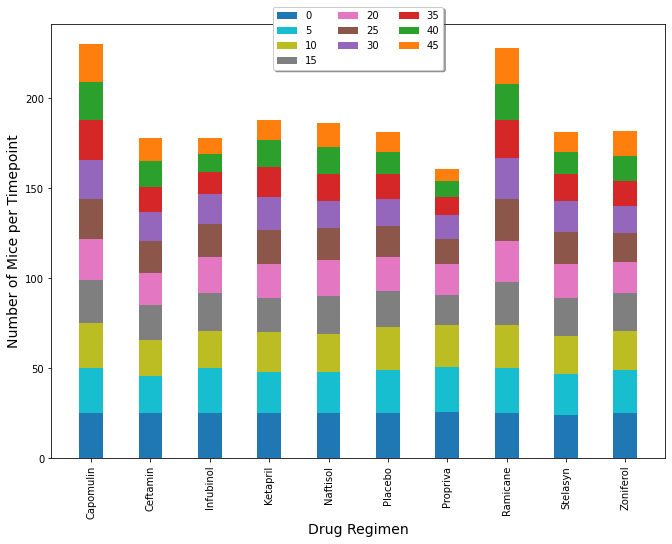

In [34]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Unique_drugsRegimen_values = combined_micestudy_results["Drug Regimen"].unique() 
Unique_drugsRegimen_values = sorted(Unique_drugsRegimen_values)
Unique_Timepoint_values = combined_micestudy_results["Timepoint"].unique() 
testmice_grouped_timepoint = combined_micestudy_results.groupby(["Timepoint"])

# to get mice count for each timepoint grouped by sorted drug name
testmice_grouped_drugsregimen =testmice_grouped_timepoint["Drug Regimen"].value_counts().sort_index().to_list()

counter = 0
combined_micecount_list = []
x_axis = np.arange(len(Unique_drugsRegimen_values))

for i in range(len(Unique_drugsRegimen_values)): 
    micecount_pertimepoint_list = []
    for j in range(len(Unique_Timepoint_values)): 
        
        micecount_pertimepoint_list.append(testmice_grouped_drugsregimen[counter])
        counter = counter + 1
    
    combined_micecount_list.append(micecount_pertimepoint_list)

data = np.array(combined_micecount_list)

#colors used for each timepoint bar 
color_list = ['C10', 'C9', 'C8', 'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1', 'C0']
fig = plt.gcf()
fig.set_size_inches(11, 8)
width = 0.4

#loop for each timepoint to create stacked bar plot
X = np.arange(data.shape[1])
for i in range(data.shape[0]):  
  plt.bar(X, data[i],width, bottom = np.sum(data[:i], axis = 0), color = color_list[i % len(color_list)])

plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Mice per Timepoint', fontsize=14)
plt.xticks(X, Unique_drugsRegimen_values,rotation=90)
plt.legend(Unique_Timepoint_values,loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()


Text(0.5, 0, 'Drug Regimen')

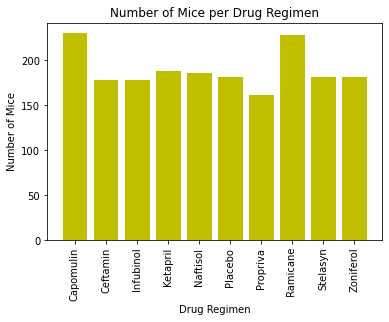

In [35]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#find the number of mice per drug regimen
testmice_grouped = combined_micestudy_results.groupby("Drug Regimen")
mice_per_treatment = combined_micestudy_results.groupby(['Drug Regimen']).count()['Mouse ID']

#to get mice count for each timepoint grouped by sorted drug name
testmice_grouped_drugsregimen = testmice_grouped_timepoint["Drug Regimen"].value_counts().sort_index().to_list()

#create an array 
users = mice_per_treatment
users

x_axis = np.arange(len(users))
x_axis

#plot the data to a bar graph
plt.bar(x=x_axis, height=users, color='y', alpha=1, align='center')

#label the bars
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',' Ramicane', 'Stelasyn', 'Zoniferol'], rotation=90)
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')


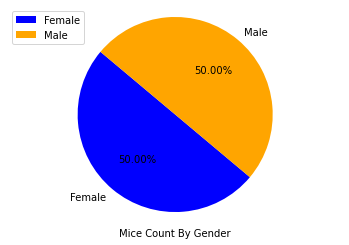

In [36]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
filtered = combined_micestudy_results.loc[(combined_micestudy_results["Timepoint"] == 0)] 
micegrouped_sex_count = filtered["Sex"].value_counts() 

colors = ["blue", "orange"]
micegrouped_sex_count.plot(kind='pie', subplots=True, colors = colors, autopct="%.2f%%", startangle=140)
plt.axis('equal')
plt.xlabel("Mice Count By Gender")
plt.ylabel("")
plt.legend()
plt.show()



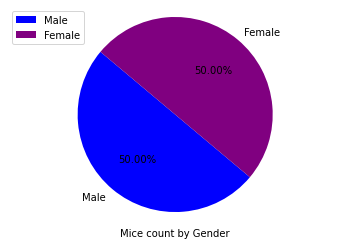

In [37]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
Unique_micesex_values = combined_micestudy_results["Sex"].unique()
mice_grouped_sex_count = filtered["Sex"].value_counts()

labels = Unique_micesex_values
sizes = mice_grouped_sex_count
colors = ["blue", "purple"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.2f%%", startangle=140)
plt.axis("equal")
plt.xlabel("Mice count by Gender")
plt.ylabel("")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = combined_micestudy_results['Drug Regimen'] == 'Capomulin'
capomulin_values = combined_micestudy_results[capomulin]
capomulin_values.head()

ramicane = combined_micestudy_results['Drug Regimen'] == 'Ramicane'
ramicane_values = combined_micestudy_results[ramicane]
ramicane_values.head()

infubinol = combined_micestudy_results['Drug Regimen'] == 'Infubinol'
infubinol_values = combined_micestudy_results[infubinol]
infubinol_values.head()

ceftamin = combined_micestudy_results['Drug Regimen'] == 'Ceftamin'
ceftamin_values = combined_micestudy_results[ceftamin]
ceftamin_values.head()

#Start by getting the last (greatest) timepoint for each mouse
cap_id = capomulin_values.groupby(['Mouse ID']).max()['Timepoint']
cap_DF = pd.DataFrame(cap_id)

ram_id = ramicane_values.groupby(['Mouse ID']).max()['Timepoint']
ram_DF = pd.DataFrame(ram_id)

inf_id = infubinol_values.groupby(['Mouse ID']).max()['Timepoint']
inf_DF = pd.DataFrame(inf_id)

cef_id = ceftamin_values.groupby(['Mouse ID']).max()['Timepoint']
cef_DF = pd.DataFrame(cef_id)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_cap = pd.merge(cap_DF, combined_micestudy_results, on=['Mouse ID', 'Timepoint'], how='left' )
merge_ram = pd.merge(ram_DF, combined_micestudy_results, on=['Mouse ID', 'Timepoint'], how='left')
merge_inf = pd.merge(inf_DF, combined_micestudy_results, on=['Mouse ID', 'Timepoint'], how='left')
merge_cef = pd.merge(cef_DF, combined_micestudy_results, on=['Mouse ID', 'Timepoint'], how='left')

In [39]:
merge_cap

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [40]:
#Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumor_volume_cap = merge_cap[['Tumor Volume (mm3)']]
tumor_volume_ram = merge_ram[['Tumor Volume (mm3)']]
tumor_volume_inf = merge_inf[['Tumor Volume (mm3)']]
tumor_volume_cef = merge_cef[['Tumor Volume (mm3)']]

data = [tumor_volume_cap, tumor_volume_ram, tumor_volume_inf, tumor_volume_cef]

In [41]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
Capomulin_filtered_df = combined_micestudy_results.loc[(combined_micestudy_results["Drug Regimen"] == "Capomulin")]
Capomulin_Micecount = Capomulin_filtered_df["Mouse ID"].unique()
Capomulin_Micecount = sorted(Capomulin_Micecount)
Capomulin_filtered_df = Capomulin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
Capomulin_filtered_df_grouped = Capomulin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Capomulin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Capomulin_tumorVol_list = []

for x in range(len(Capomulin_Micecount)):
    Capomulin_Mice_df = Capomulin_filtered_df.loc[(Capomulin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Capomulin_filtered_df["Mouse ID"] == Capomulin_Micecount[x])]
    tumorvolume = round(float(Capomulin_Mice_df["Tumor Volume (mm3)"]),2)
    Capomulin_tumorVol_list.append(tumorvolume)
Capomulin_tumorVol_list.sort()
Capomulin_tumorVol_df = pd.DataFrame(Capomulin_tumorVol_list, columns=['TumorVol'] )
    
#Ramicane
Ramicane_filtered_df = combined_micestudy_results.loc[(combined_micestudy_results["Drug Regimen"] == "Ramicane")]
Ramicane_Micecount = Ramicane_filtered_df["Mouse ID"].unique()
Ramicane_Micecount = sorted(Ramicane_Micecount)
Ramicane_filtered_df = Ramicane_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
Ramicane_filtered_df_grouped = Ramicane_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ramicane_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ramicane_tumorVol_list = []

for x in range(len(Ramicane_Micecount)):
    Ramicane_Mice_df = Ramicane_filtered_df.loc[(Ramicane_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ramicane_filtered_df["Mouse ID"] == Ramicane_Micecount[x])]
    tumorvolume = round(float(Ramicane_Mice_df["Tumor Volume (mm3)"]),5)
    Ramicane_tumorVol_list.append(tumorvolume)
Ramicane_tumorVol_list.sort()
Ramicane_tumorVol_df = pd.DataFrame(Ramicane_tumorVol_list, columns=['TumorVol'] )

#Infubinol
Infubinol_filtered_df = combined_micestudy_results.loc[(combined_micestudy_results["Drug Regimen"] == "Infubinol")]
Infubinol_Micecount = Infubinol_filtered_df["Mouse ID"].unique()
Infubinol_Micecount = sorted(Infubinol_Micecount)
Infubinol_filtered_df = Infubinol_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
Infubinol_filtered_df_grouped = Infubinol_filtered_df.groupby("Mouse ID")
TimepointMaxList = Infubinol_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Infubinol_tumorVol_list = []

for x in range(len(Infubinol_Micecount)):
    Infubinol_Mice_df = Infubinol_filtered_df.loc[(Infubinol_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Infubinol_filtered_df["Mouse ID"] == Infubinol_Micecount[x])]
    tumorvolume = round(float(Infubinol_Mice_df["Tumor Volume (mm3)"]),5)
    Infubinol_tumorVol_list.append(tumorvolume)
Infubinol_tumorVol_list.sort()
Infubinol_tumorVol_df = pd.DataFrame(Infubinol_tumorVol_list, columns=['TumorVol'] )

#Ceftamin
Ceftamin_filtered_df = combined_micestudy_results.loc[(combined_micestudy_results["Drug Regimen"] == "Ceftamin")]
Ceftamin_Micecount = Ceftamin_filtered_df["Mouse ID"].unique()
Ceftamin_Micecount = sorted(Ceftamin_Micecount)
Ceftamin_filtered_df = Ceftamin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
Ceftamin_filtered_df_grouped = Ceftamin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ceftamin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ceftamin_tumorVol_list = []

for x in range(len(Ceftamin_Micecount)):
    Ceftamin_Mice_df = Ceftamin_filtered_df.loc[(Ceftamin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ceftamin_filtered_df["Mouse ID"] == Ceftamin_Micecount[x])]
    tumorvolume = round(float(Ceftamin_Mice_df["Tumor Volume (mm3)"]),5)
    Ceftamin_tumorVol_list.append(tumorvolume)
Ceftamin_tumorVol_list.sort()
Ceftamin_tumorVol_df = pd.DataFrame(Ceftamin_tumorVol_list, columns=['TumorVol'] )    


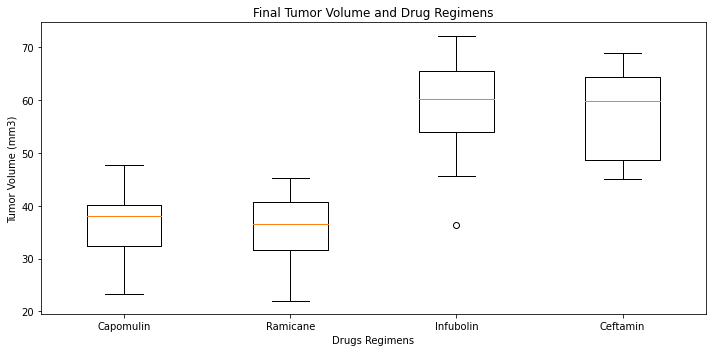

In [42]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap = np.array(tumor_volume_cap).flatten()
ram = np.array(tumor_volume_ram).flatten()
inf = np.array(tumor_volume_inf).flatten()
cef = np.array(tumor_volume_cef).flatten()

data = [cap, ram, inf, cef]

fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
boxplot = ax.boxplot(data)

#label axes
plt.title('Final Tumor Volume and Drug Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drugs Regimens')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubolin', 'Ceftamin'])

plt.tight_layout()

## Line and Scatter Plots

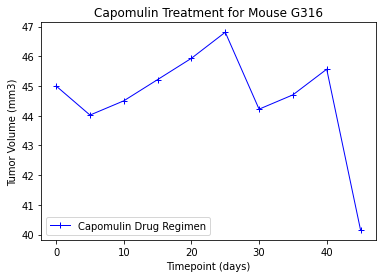

In [43]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#random mouse with capomulin treatment
g316_data = capomulin_values.loc[capomulin_values['Mouse ID'] == "g316", :]
g316_axis = g316_data['Timepoint']
g316_data = g316_data['Tumor Volume (mm3)']

#plot & label 
plt.plot(g316_axis, g316_data, marker="+",color="blue", linewidth=1, label='Capomulin Drug Regimen')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse G316')
plt.legend()
plt.show()

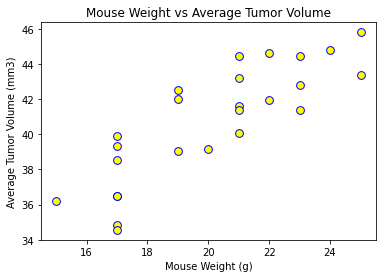

In [44]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#data for the drug capomulin
capomulin = combined_micestudy_results['Drug Regimen'] == 'Capomulin'
capomulin_values = combined_micestudy_results[capomulin]
mice_cap = capomulin_values.groupby(['Mouse ID'])
average = mice_cap.mean()
tumorAve = average['Tumor Volume (mm3)']
weightAve = average['Weight (g)']

#plot scatter plot
plt.scatter(weightAve, tumorAve, marker="o", facecolors="yellow", edgecolors="blue", s=60, alpha=1)

#label axes
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


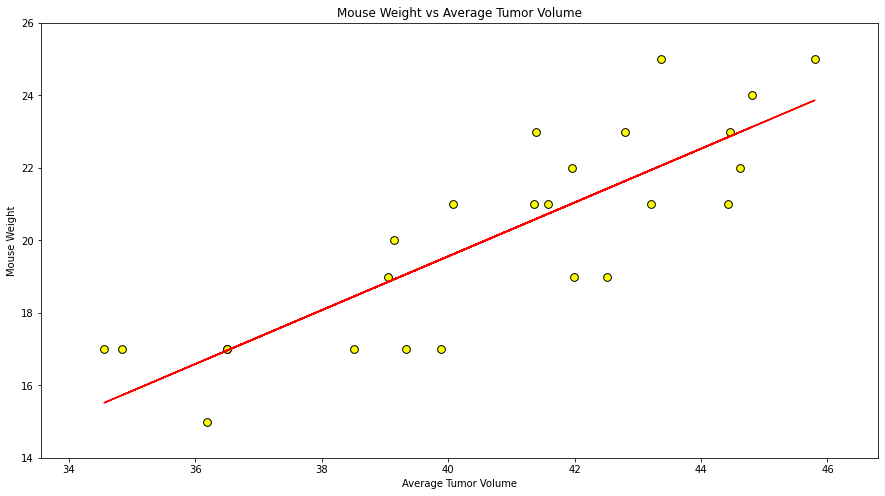

In [45]:
#Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumorAve, weightAve)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(tumorAve,weightAve)[0],2)}")

x_values = tumorAve
y_values = weightAve
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="yellow", edgecolors="black", s=60, alpha=1)
fig = plt.gcf()

plt.xlim(min(tumorAve) - 1,max(tumorAve) + 1)
plt.ylim(min(weightAve) - 1,max(weightAve) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(40, 23),fontsize=10,color="red") <---Doesn't work properly. See cell below for answer.
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
fig.set_size_inches(15,8)
plt.show()

In [46]:
plt.annotate(line_eq,(44, 23))


Text(44, 23, 'y = 0.74x + -10.15')